In [1]:
import tensorflow as tf  #BAŞLANGIÇ SADE
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
image_height, image_width = 48, 48

In [3]:
train_dataset = image_dataset_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/train',  
    shuffle=True,
    batch_size=32,
    image_size=(image_height, image_width),
    color_mode='grayscale')

validation_dataset = image_dataset_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/validation', 
    shuffle=True,
    batch_size=32,
    image_size=(image_height, image_width),
    color_mode='grayscale')

Found 11157 files belonging to 2 classes.
Found 2785 files belonging to 2 classes.


In [4]:
model = models.Sequential([
    layers.Input(shape=(image_height, image_width, 1)), 
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(
    train_dataset, 
    epochs=50, 
    validation_data=validation_dataset
)

Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6283 - loss: 3.0635 - val_accuracy: 0.7515 - val_loss: 0.5105
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7653 - loss: 0.4832 - val_accuracy: 0.8036 - val_loss: 0.4024
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8086 - loss: 0.4076 - val_accuracy: 0.8126 - val_loss: 0.4132
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8312 - loss: 0.3706 - val_accuracy: 0.8266 - val_loss: 0.3734
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8538 - loss: 0.3435 - val_accuracy: 0.8212 - val_loss: 0.3804
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8651 - loss: 0.3081 - val_accuracy: 0.8345 - val_loss: 0.3808
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8791 - loss: 0.2812 - val_accuracy: 0.8312 - val_loss: 0.4186
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8950 - loss: 0.2522 - val_acc

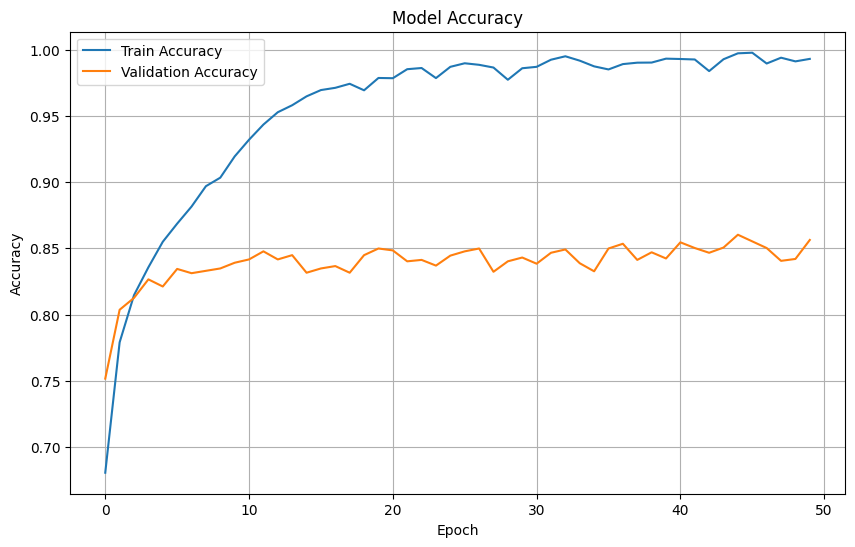

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Save the model with the '.keras' extension
model.save('havanilla_model.keras')  # This specifies the Keras native format